In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import plotly.graph_objects as go

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('../input/udemy-courses/udemy_courses.csv')

In [5]:
df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance


In [6]:
df.is_paid = df.is_paid.astype(int)

In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   int64  
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 1.7 MB


In [8]:
df.describe()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,0.915715,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,0.277852,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,1.000000,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,1.000000,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,1.000000,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,1.000000,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [9]:
# df[df['is_paid'] == 'https://www.udemy.com/learnguitartoworship/']

In [10]:
# df.set_index('course_id').reset_index()
# df.drop([2066],inplace=True)

Course Type is Paid or Free 

1    3368
0     310
Name: is_paid, dtype: int64


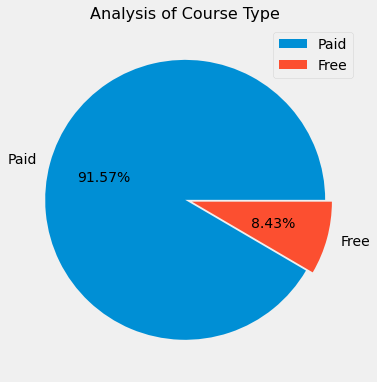

In [11]:
labels = ['Paid', 'Free']
# df['is_paid'] = df['is_paid'].str.lower()
size = df['is_paid'].value_counts()
print(size)
explode = [0, 0.05]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, explode = explode, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('Analysis of Course Type', fontsize = 16)
plt.axis('off')
plt.legend()
plt.show()

Distribution Of Prices

Text(0.5, 1.0, 'Distribution of price')

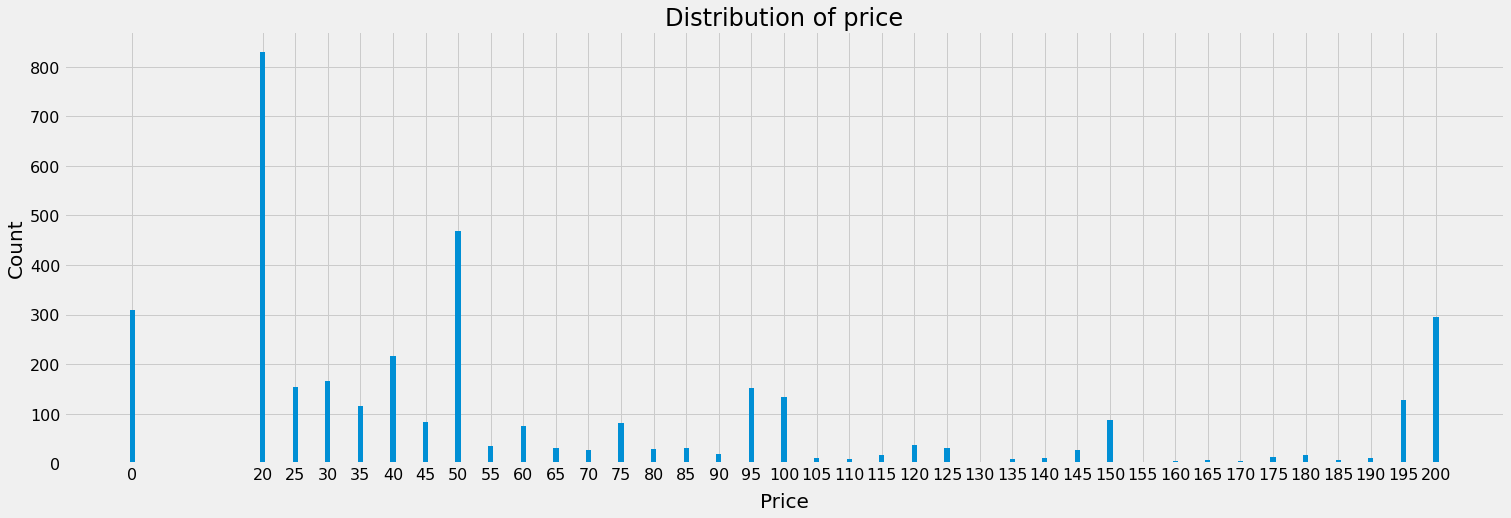

In [12]:
pricevscount = df.loc[:,['price','course_id']].groupby('price', as_index=False).count()
fig = plt.figure(figsize=[20,6])
axes = fig.add_axes([0,0,1,1])
axes.bar(pricevscount['price'], pricevscount['course_id'])
axes.set_xticks(pricevscount['price'].values)
axes.tick_params('x', labelsize=16)
axes.tick_params('y', labelsize=16)
axes.set_xlabel('Price', fontsize=20, labelpad=10)
axes.set_ylabel('Count', fontsize=20)
axes.set_title('Distribution of price', fontsize=24)

Course Subject Type

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64


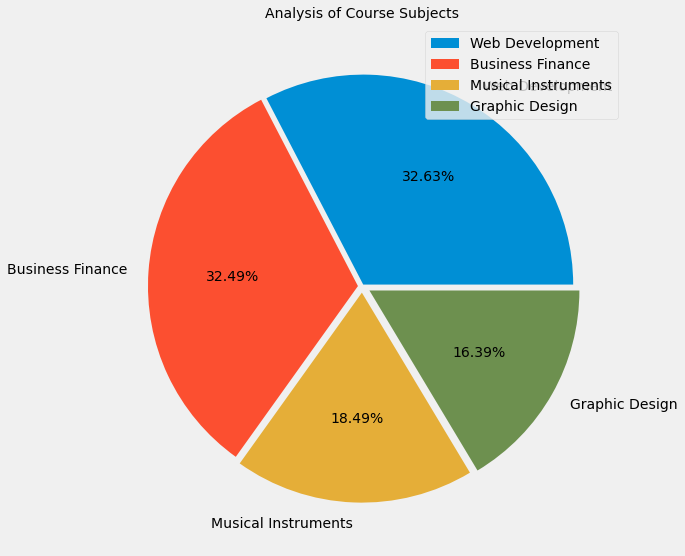

In [13]:
labels = ['Web Development', 'Business Finance', 'Musical Instruments', 'Graphic Design']
size = df['subject'].value_counts()
print(size)
explode = [0.01, 0.02,0.03,0.04]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, explode = explode, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('Analysis of Course Subjects', fontsize = 14)
# plt.axis('off')
plt.legend()
plt.show()

Subscribers Proportional to reviews

In [14]:
subscribersandreviews = df.loc[:,['num_subscribers','num_reviews']].corr()
subscribersandreviews

,num_subscribers,num_reviews
num_subscribers,1.000000,0.649946
num_reviews,0.649946,1.000000


Text(0, 0.5, 'Number of reviews')

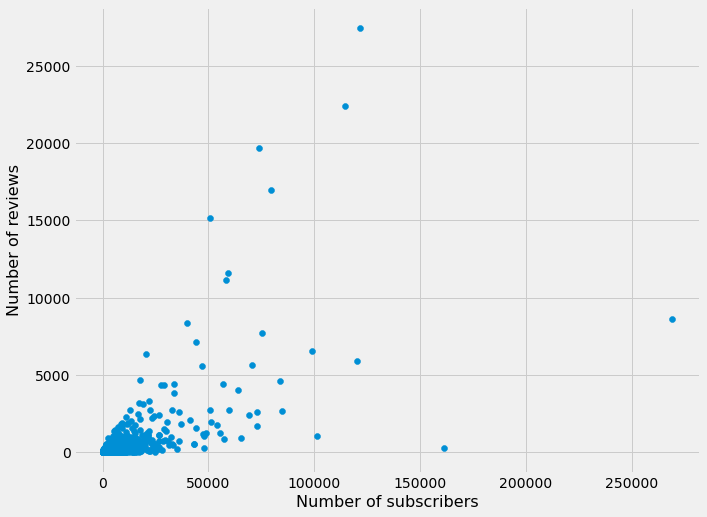

In [15]:
fig = plt.figure(figsize=[10,8])
axes = fig.subplots()
axes.scatter(df['num_subscribers'], df['num_reviews'])
axes.set_xlabel('Number of subscribers', fontsize=16)
axes.set_ylabel('Number of reviews', fontsize=16)

Top Five Courses with More Subscribers 

In [16]:
df.sort_values('num_subscribers', ascending=False).loc[:,'course_title'].head()

2827                 Learn HTML5 Programming From Scratch
3032                       Coding for Entrepreneurs Basic
3230                           The Web Developer Bootcamp
2783    Build Your First Website in 1 Week with HTML5 ...
3232                The Complete Web Developer Course 2.0
Name: course_title, dtype: object

Top Five Courses with More Reviews

In [17]:
df.sort_values('num_reviews', ascending=False).loc[:,'course_title'].head()

3230                           The Web Developer Bootcamp
3232                The Complete Web Developer Course 2.0
3204    Angular 4 (formerly Angular 2) - The Complete ...
3247            JavaScript: Understanding the Weird Parts
3254                              Modern React with Redux
Name: course_title, dtype: object

Top Ten Courses in Udemy

In [18]:
df.sort_values(['num_subscribers', 'num_reviews'], ascending=False).loc[:,'course_title'].head(10)

2827                 Learn HTML5 Programming From Scratch
3032                       Coding for Entrepreneurs Basic
3230                           The Web Developer Bootcamp
2783    Build Your First Website in 1 Week with HTML5 ...
3232                The Complete Web Developer Course 2.0
1896                Free Beginner Electric Guitar Lessons
2589    Web Design for Web Developers: Build Beautiful...
2619               Learn Javascript & JQuery From Scratch
3289    Practical PHP: Master the Basics and Code Dyna...
3247            JavaScript: Understanding the Weird Parts
Name: course_title, dtype: object

Price of Popular Courses 

In [19]:
df.sort_values(['num_subscribers', 'num_reviews'], ascending=False).loc[:,['course_title','price']].head(10)

,course_title,price
2827,Learn HTML5 Programming From Scratch,0
3032,Coding for Entrepreneurs Basic,0
3230,The Web Developer Bootcamp,200
2783,Build Your First Website in 1 Week with HTML5 ...,0
3232,The Complete Web Developer Course 2.0,200
1896,Free Beginner Electric Guitar Lessons,0
2589,Web Design for Web Developers: Build Beautiful...,0
2619,Learn Javascript & JQuery From Scratch,30
3289,Practical PHP: Master the Basics and Code Dyna...,0
3247,JavaScript: Understanding the Weird Parts,175


Are Unpaid Courses More Popular

Text(0, 0.5, 'Number of reviews')

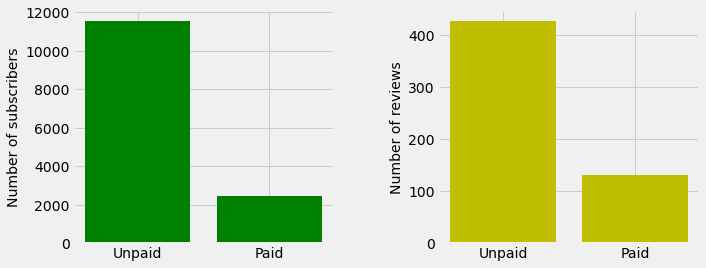

In [20]:
paidPopularityGroups = df.groupby('is_paid', as_index=False).mean()
fig = plt.figure(figsize=(10,4))
axes = fig.subplots(ncols=2)
fig.subplots_adjust(wspace=0.4)
axes[0].bar(paidPopularityGroups['is_paid'], paidPopularityGroups['num_subscribers'], color='g')
axes[1].bar(paidPopularityGroups['is_paid'], paidPopularityGroups['num_reviews'], color='y')
axes[0].set_xticks([0,1])
axes[1].set_xticks([0,1])
axes[0].set_xticklabels(['Unpaid', 'Paid'])
axes[1].set_xticklabels(['Unpaid', 'Paid'])
axes[0].set_ylabel('Number of subscribers', fontsize=14)
axes[1].set_ylabel('Number of reviews', fontsize=14)

Popluarity by Subject

Text(0.5, 1.0, 'Popularity by reviews')

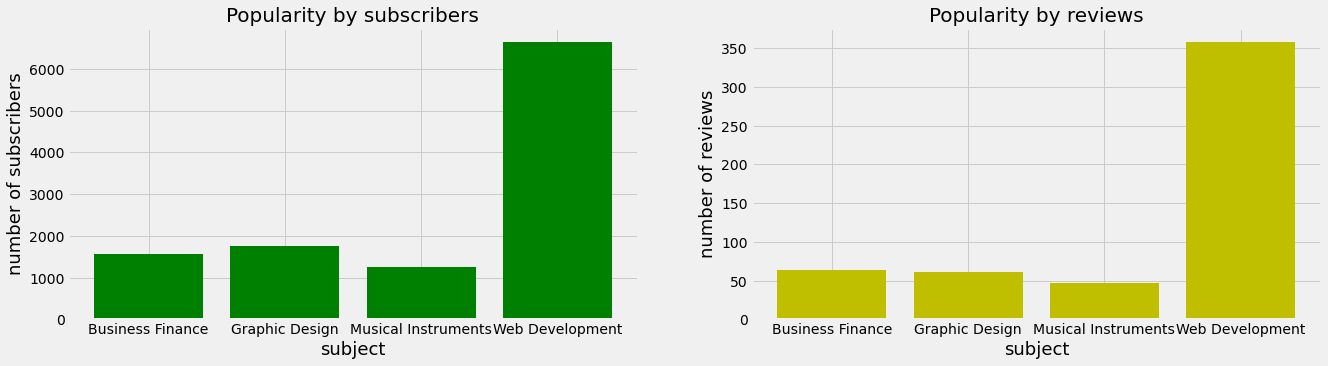

In [21]:
subjectGroup = df.groupby('subject', as_index=False).mean()
fig = plt.figure(figsize=[20,5])
axes = fig.subplots(ncols=2)
axes[0].bar(subjectGroup['subject'].values, subjectGroup['num_subscribers'].values, color='g' )
axes[1].bar(subjectGroup['subject'].values, subjectGroup['num_reviews'].values, color='y' )
axes[0].set_xlabel('subject', fontsize='18')
axes[1].set_xlabel('subject', fontsize='18')
axes[0].set_ylabel('number of subscribers', fontsize=18)
axes[1].set_ylabel('number of reviews', fontsize=18)
axes[0].set_title('Popularity by subscribers', fontsize=20)
axes[1].set_title('Popularity by reviews', fontsize=20)

 Number of Lectures by Course Type (Free/Paid)

In [22]:
coures_free_lectures = df[df['is_paid'] == False]['num_lectures'].sum()
coures_paid_lectures = df[df['is_paid'] == True]['num_lectures'].sum()
plt.rcParams['figure.figsize'] = (10.0, 5.0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=["Free", "Paid"],
    y=[coures_free_lectures, coures_paid_lectures],
    width=[0.3, 0.3]
))
# Change the bar mode
fig.update_layout(title="Number of Lectures by Course Type (Free/ Paid)")
fig.show()

#### Number of Lectures in Paid Course are more than Free Courses.

Course type by courses

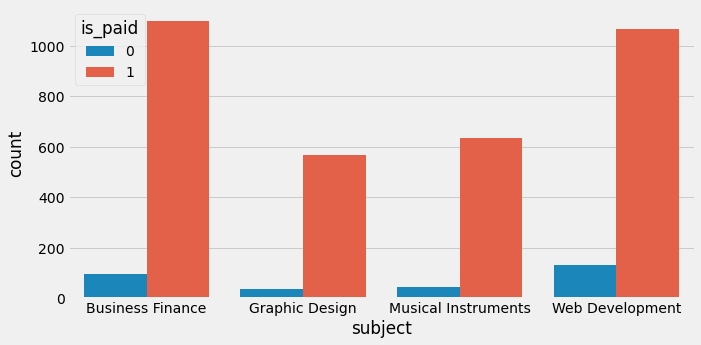

In [23]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
ax = sns.countplot(x="subject", hue="is_paid", data=df)

In [24]:
max_subs = df[['course_title', 'num_subscribers', 'num_reviews', 'price', 'is_paid', 'subject', 'num_lectures']]

In [25]:
top_10 = max_subs.sort_values(by='num_subscribers', ascending=False).head(10)

In [26]:
fig = go.Figure(data=[
    go.Bar(name='Subscribers', x=top_10['course_title'], y=top_10['num_subscribers'],text=top_10['num_subscribers'],textposition='auto'),
    go.Bar(name='Reviews', x=top_10['course_title'], y=top_10['num_reviews'],text=top_10['num_reviews'],textposition='auto')
])

# Change the bar mode
fig.update_layout(barmode='group',xaxis_tickangle=-40,title="Top 10 courses subscribers and reviews")
fig.show()

Top 10 courses

In [27]:
fig = go.Figure(data=[
    go.Bar(name='Subscribers', x=top_10['num_subscribers'], y=top_10['course_title'], orientation='h'),
])
fig.update_layout(title="Top 10 courses")
fig.show()

In [28]:
import plotly.express as px

fig = px.bar(max_subs.head(10), x='course_title', y='num_subscribers',
             hover_data=['num_subscribers'], color='num_subscribers',
             labels={'pop':'Top 10 courses'}, height=600)
fig.show()

Top 10 Free Courses

In [29]:
top_10_free = max_subs[max_subs.is_paid == False]
top_10_free = top_10_free.sort_values(by='num_subscribers', ascending=False)
top_10_free

,course_title,num_subscribers,num_reviews,price,is_paid,subject,num_lectures
2827,Learn HTML5 Programming From Scratch,268923,8629,0,0,Web Development,45
3032,Coding for Entrepreneurs Basic,161029,279,0,0,Web Development,27
2783,Build Your First Website in 1 Week with HTML5 ...,120291,5924,0,0,Web Development,30
1896,Free Beginner Electric Guitar Lessons,101154,1042,0,0,Musical Instruments,95
2589,Web Design for Web Developers: Build Beautiful...,98867,6512,0,0,Web Development,20
...,...,...,...,...,...,...,...
1208,Deinen Roman setzen mit PagePlus in 10 einfach...,69,6,0,0,Graphic Design,25
2421,What you can learn before Piano Lessons,61,1,0,0,Musical Instruments,31
1209,画像加工の初心者でも「１日」で初歩を覚えられる無料講座,21,0,0,0,Graphic Design,18
1108,Condor Broken Wing Butterfly Options Trading C...,16,0,0,0,Business Finance,15


In [30]:
fig = px.bar(top_10_free.head(10), x='num_subscribers', y='course_title', width=890, height=400, orientation='h')
fig.update_layout(title="Top 10 Free courses", xaxis_title="Subscribers",yaxis_title="Course ")
fig.update_yaxes(automargin=True)

fig.show()

Web Development        133
Business Finance        96
Musical Instruments     46
Graphic Design          35
Name: subject, dtype: int64


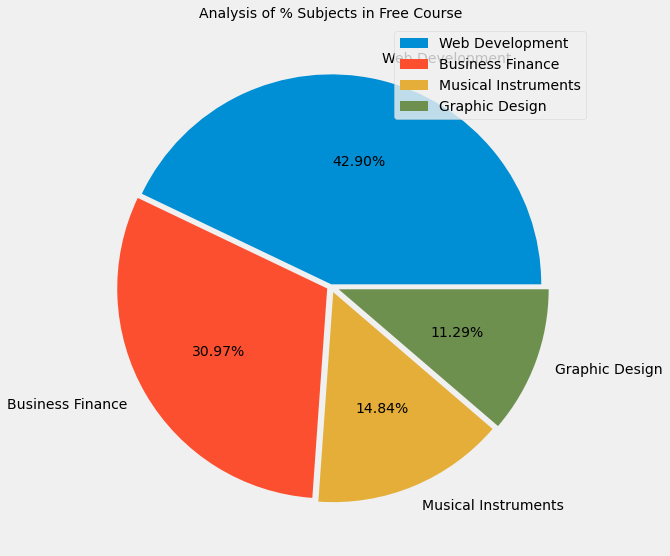

In [31]:
labels = ['Web Development', 'Business Finance', 'Musical Instruments', 'Graphic Design']
size = top_10_free['subject'].value_counts()
print(size)
explode = [0.01, 0.02,0.03,0.04]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, explode = explode, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('Analysis of % Subjects in Free Course', fontsize = 14)
plt.legend()
plt.show()

#### Web Development courses are most popular in free courses

Top 10 Paid Course

In [32]:
top_10_paid = max_subs[max_subs.is_paid == True]
top_10_paid = top_10_paid.sort_values(by='num_subscribers', ascending=False)
top_10_paid

,course_title,num_subscribers,num_reviews,price,is_paid,subject,num_lectures
3230,The Web Developer Bootcamp,121584,27445,200,1,Web Development,342
3232,The Complete Web Developer Course 2.0,114512,22412,200,1,Web Development,304
2619,Learn Javascript & JQuery From Scratch,84897,2685,30,1,Web Development,10
3247,JavaScript: Understanding the Weird Parts,79612,16976,175,1,Web Development,85
1979,Pianoforall - Incredible New Way To Learn Pian...,75499,7676,200,1,Musical Instruments,362
...,...,...,...,...,...,...,...
453,Essentials of money value: Get a financial Life !,0,0,20,1,Business Finance,20
454,Introduction to Forex Trading Business For Beg...,0,0,20,1,Business Finance,27
455,Cryptocurrency (BTC & ETH) Investment & Tradin...,0,0,20,1,Business Finance,7
456,Introduction to Project Management for Finance...,0,0,50,1,Business Finance,9


In [33]:
fig = px.bar(top_10_paid.head(10), x='num_subscribers', y='course_title', width=890, height=400, orientation='h')
fig.update_layout(title="Top 10 Paid courses", xaxis_title="Subscribers",yaxis_title="Course ")
fig.update_yaxes(automargin=True)
fig.show()

Business Finance       1099
Web Development        1067
Musical Instruments     634
Graphic Design          568
Name: subject, dtype: int64


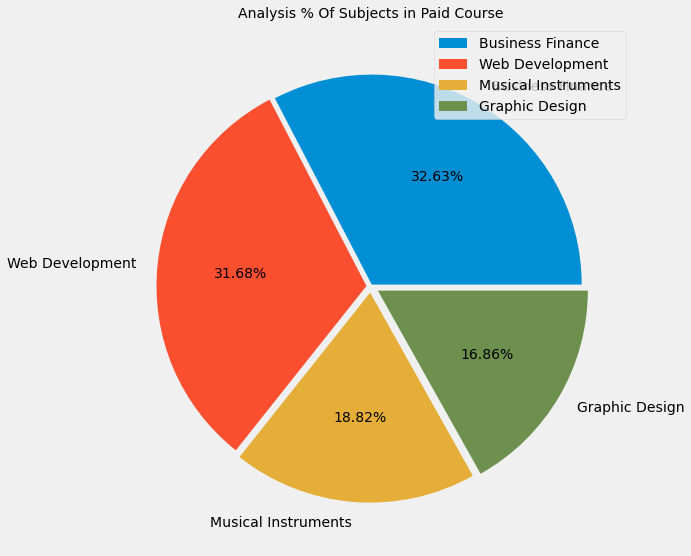

In [34]:
labels = ['Business Finance', 'Web Development', 'Musical Instruments', 'Graphic Design']
size = top_10_paid['subject'].value_counts()
print(size)
explode = [0.01, 0.02,0.03,0.04]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, explode = explode, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('Analysis % Of Subjects in Paid Course', fontsize = 14)
plt.legend()
plt.show()

#### Business Finance and Web Development courses are most popular in Paid courses.

Text(0, 0.5, 'Count')

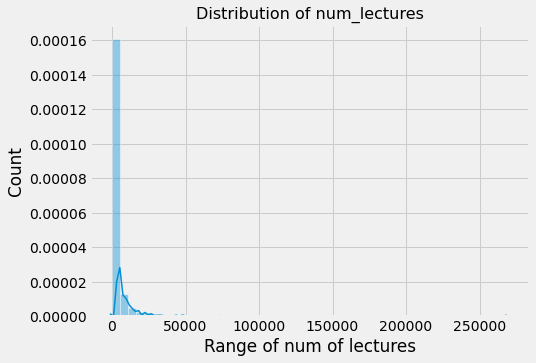

In [35]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (7, 5)

plt.subplot(1, 1, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['num_subscribers'])
plt.title('Distribution of num_lectures', fontsize = 16)
plt.xlabel('Range of num of lectures')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

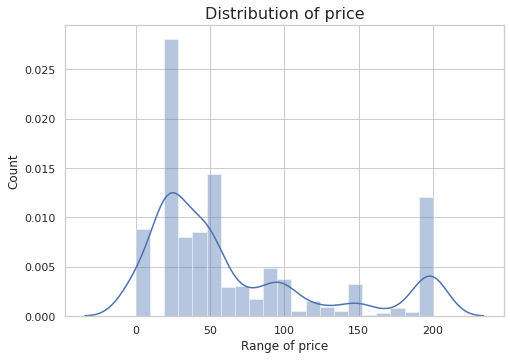

In [36]:
plt.rcParams['figure.figsize'] = (7, 5)

plt.subplot(1, 1, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['price'])
plt.title('Distribution of price', fontsize = 16)
plt.xlabel('Range of price')
plt.ylabel('Count')

Duration of Popular Courses

In [37]:
df.sort_values(['num_subscribers', 'num_reviews'], ascending=False).loc[:,['course_title','price', 'content_duration']].head(10)

,course_title,price,content_duration
2827,Learn HTML5 Programming From Scratch,0,10.5
3032,Coding for Entrepreneurs Basic,0,3.5
3230,The Web Developer Bootcamp,200,43.0
2783,Build Your First Website in 1 Week with HTML5 ...,0,3.0
3232,The Complete Web Developer Course 2.0,200,30.5
1896,Free Beginner Electric Guitar Lessons,0,4.5
2589,Web Design for Web Developers: Build Beautiful...,0,3.0
2619,Learn Javascript & JQuery From Scratch,30,2.0
3289,Practical PHP: Master the Basics and Code Dyna...,0,6.5
3247,JavaScript: Understanding the Weird Parts,175,11.5


Distribution of Content Duration

Text(0, 0.5, 'Count')

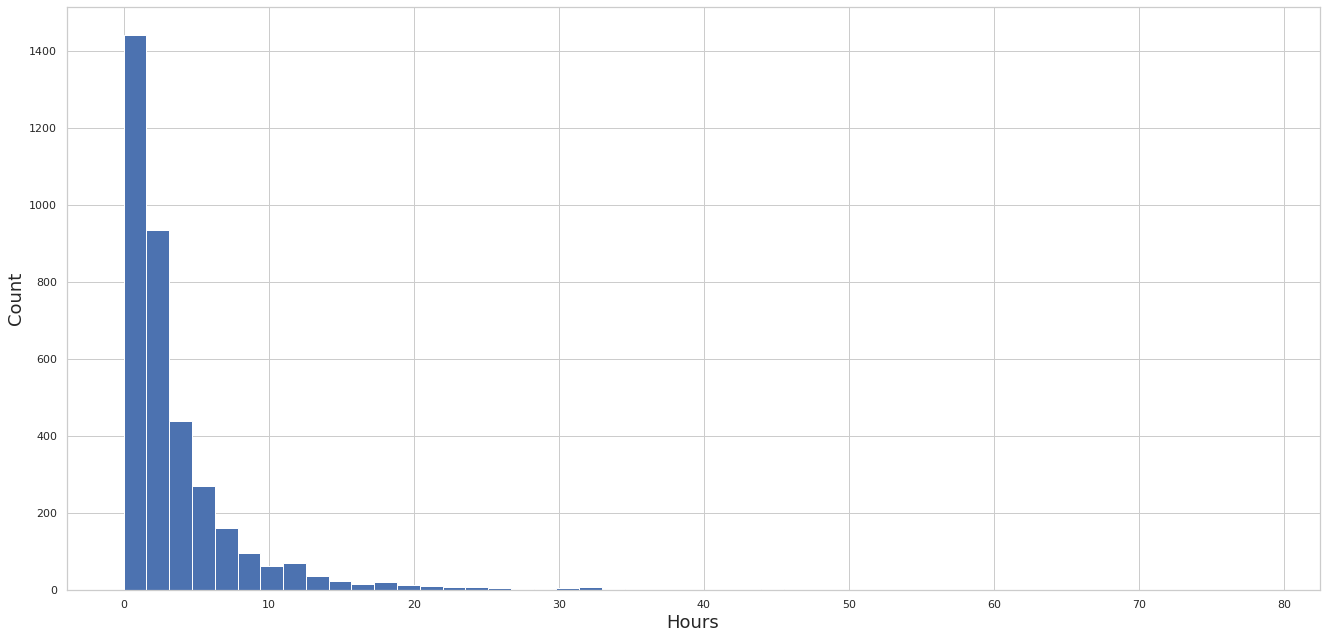

In [38]:
fig = plt.figure(figsize=(20,10))
axes = fig.subplots()
axes.hist(df['content_duration'], bins=50)
axes.set_xlabel('Hours', fontsize='18')
axes.set_ylabel('Count', fontsize='18')

Text(0, 0.5, 'Count')

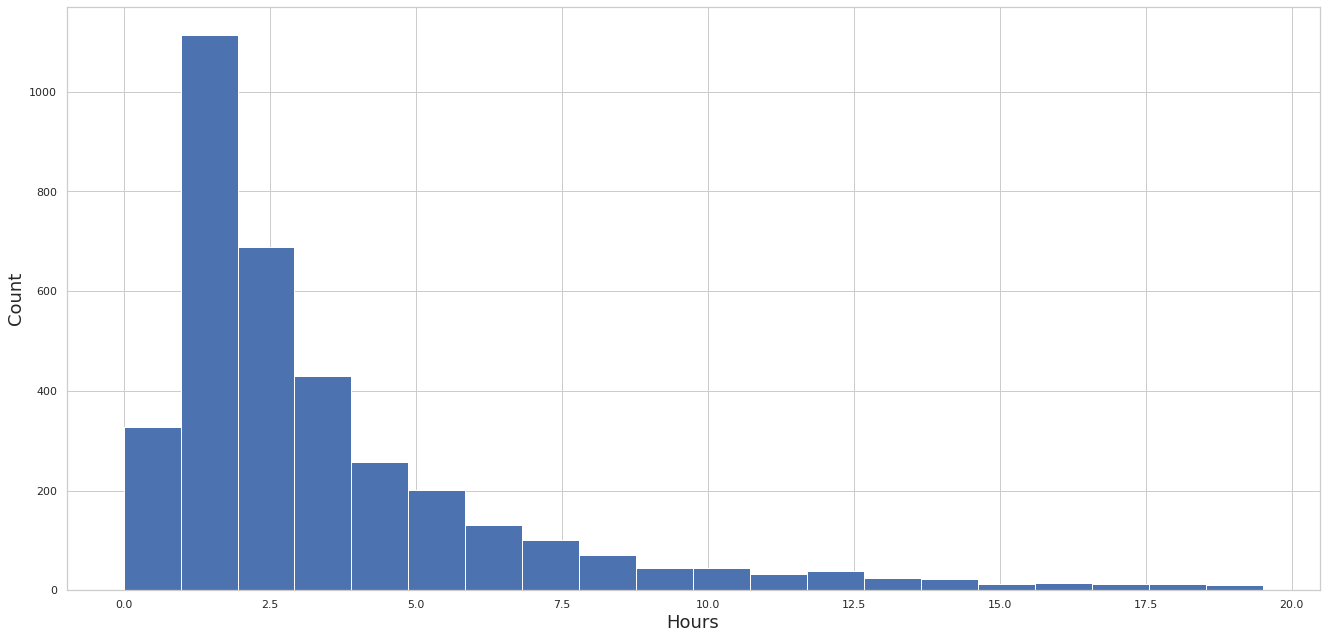

In [39]:
fig = plt.figure(figsize=(20,10))
axes = fig.subplots()
axes.hist(df[df['content_duration'] < 20]['content_duration'], bins=20)
axes.set_xlabel('Hours', fontsize='18')
axes.set_ylabel('Count', fontsize='18')

Duration of Paid and Free Courses

Text(0, 0.5, 'Hours')

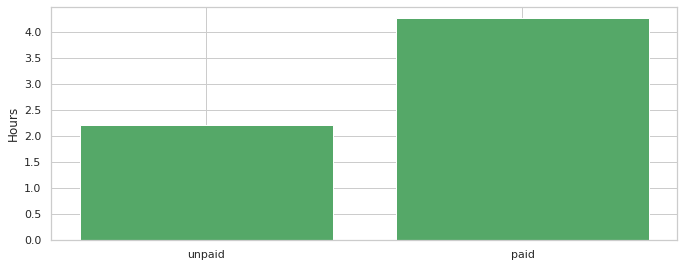

In [40]:
paidGroup = df.groupby('is_paid', as_index=False).mean()
fig = plt.figure(figsize=(10,4))
axes = fig.subplots()
axes.bar(paidGroup['is_paid'], paidGroup['content_duration'], color='g')
axes.set_xticks([0,1])
axes.set_xticklabels(['unpaid', 'paid'])
axes.set_ylabel('Hours')

Text(0.5, 1.0, 'Price X Minutes')

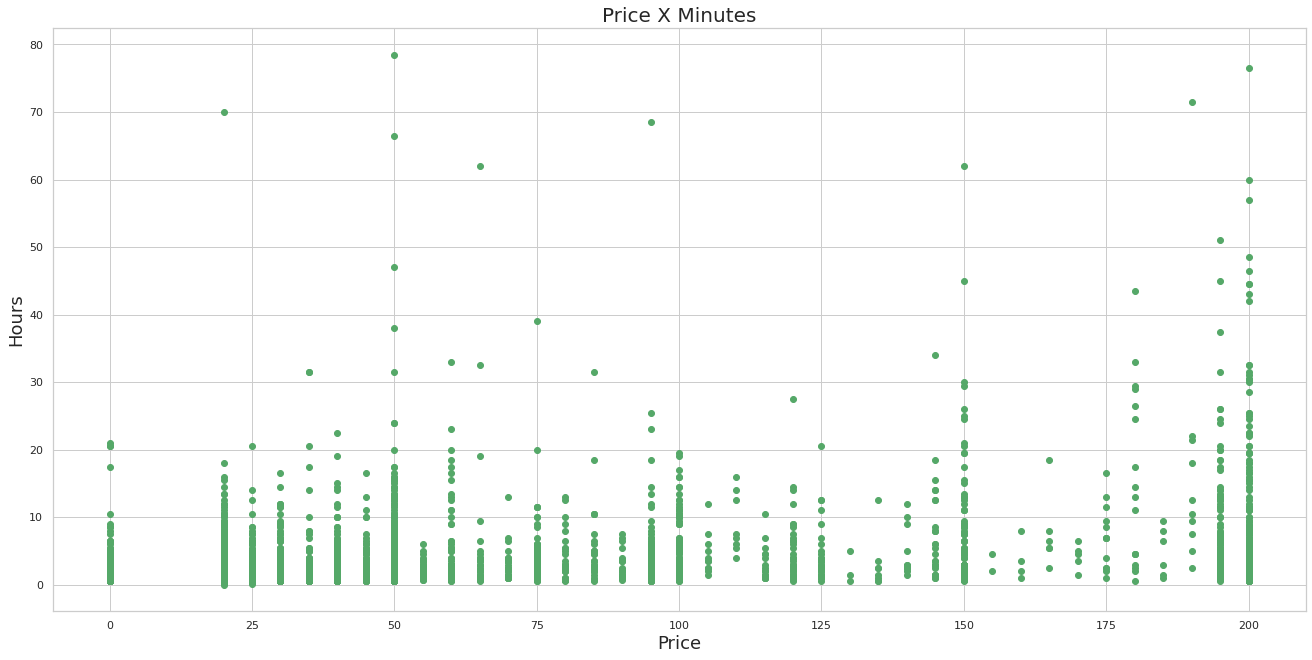

In [41]:
fig = plt.figure(figsize=(20,10))
axes = fig.subplots()
axes.scatter(df['price'], df['content_duration'], color='g')
axes.set_xlabel('Price', fontsize=18)
axes.set_ylabel('Hours', fontsize=18)
axes.set_title('Price X Minutes', fontsize=20)